<a href="https://colab.research.google.com/github/JulioSan02/UNCC/blob/4105/JS_4105_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

drive.mount('/content/drive')

# Import cancer dataset
file_path_1 = '/content/drive/MyDrive/Colab_Notebooks/Data/cancer.csv'
dataset_1 = pd.DataFrame(pd.read_csv(file_path_1))
dataset_1.head()

Mounted at /content/drive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Replace letters with number, B = 0 and M = 1
dataset_1['diagnosis'].replace('B', 0, inplace=True)
dataset_1['diagnosis'].replace('M', 1, inplace=True)

dataset_1.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [4]:
# Consider pregnancies, glucose, blood pressure, skin thickness, insulin, BMI,
# pedigree function, and age as independent variables (X1, X2, X3, X4, X5, X6, X7, X8)
# Consider outcome (having or not having diabetes) as the dependent Variable (Y).
X_1 = dataset_1.iloc[:, 2:32].values
Y_1 = dataset_1.iloc[:, 1].values


In [5]:
# Split our Data set into Training Data and Test Data. Training data trains
# logistic model and test data validates logistic model.
# train_test_split from sklearn.model_selection will be used to split data.
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y_1, test_size = 0.2, random_state = 0)

# Use standard scaling from sSklearn to scale data between -1 and 1 for better accuracy.
scale = StandardScaler()
X_train_1 = scale.fit_transform(X_train_1)
X_test_1 = scale.transform(X_test_1)


In [6]:
def PCA_function(X_train, X_test, K):
  pca = PCA(n_components=K)
  X_train_PCA = pca.fit_transform(X_train)
  X_test_PCA = pca.fit_transform(X_test)
  return X_train_PCA, X_test_PCA

In [28]:
accuracy_at_K_1 = 0

K_vector_1 = []
recall_1_vector = []
precision_1_vector = []
accuracy_1_vector = []
F1_score_1_vector = []

model_sig_1 = SVC(kernel='sigmoid', C=1E7)

for K in range(1, 31):
  X_train_1_PCA, X_test_1_PCA = PCA_function(X_train_1, X_test_1, K)

  model_sig_1.fit(X_train_1_PCA, Y_train_1)
  Y_pred_1_sig = model_sig_1.predict(X_test_1_PCA)

  K_vector_1.append(K)
  recall_1_vector.append(metrics.recall_score(Y_test_1, Y_pred_1_sig))
  precision_1_vector.append(metrics.precision_score(Y_test_1, Y_pred_1_sig))
  accuracy_1_vector.append(metrics.accuracy_score(Y_test_1, Y_pred_1_sig))
  F1_score_1_vector.append(metrics.f1_score(Y_test_1, Y_pred_1_sig))

  if (metrics.accuracy_score(Y_test_1, Y_pred_1_sig) > accuracy_at_K_1):
    accuracy_at_K_1 = metrics.accuracy_score(Y_test_1, Y_pred_1_sig)
    best_K_1 = K

print('Best K value  for problem 4 from HW 3: ', best_K_1)
print('\nAccuracy using best K for problem 4 from HW 3: ', accuracy_at_K_1)
print('\nRecall history for problem 4 from HW 3: ', recall_1_vector[-5:])
print('\nAccuracy history for problem 4 from HW 3: ', accuracy_1_vector[-5:])
print('\nPrecision history for problem 4 from HW 3: ', precision_1_vector[-5:])
print('\nF1 score history for problem 4 from HW 3: ', F1_score_1_vector[-5:])

table_1 = {'K': K_vector_1, 'Accuracy' : accuracy_1_vector, 'Recall': recall_1_vector, 'Precision' : precision_1_vector, 'F1 Score' : F1_score_1_vector}
final_table_1 = pd.DataFrame(table_1)
print('\n', final_table_1[: 10])

Best K value  for problem 4 from HW 3:  4

Accuracy using best K for problem 4 from HW 3:  0.9035087719298246

Recall history for problem 4 from HW 3:  [0.8085106382978723, 0.8297872340425532, 0.8297872340425532, 0.8297872340425532, 0.8297872340425532]

Accuracy history for problem 4 from HW 3:  [0.8333333333333334, 0.8421052631578947, 0.8421052631578947, 0.8421052631578947, 0.8421052631578947]

Precision history for problem 4 from HW 3:  [0.7916666666666666, 0.7959183673469388, 0.7959183673469388, 0.7959183673469388, 0.7959183673469388]

F1 score history for problem 4 from HW 3:  [0.7999999999999999, 0.8125, 0.8125, 0.8125, 0.8125]

     K  Accuracy    Recall  Precision  F1 Score
0   1  0.859649  0.808511   0.844444  0.826087
1   2  0.894737  0.829787   0.906977  0.866667
2   3  0.885965  0.872340   0.854167  0.863158
3   4  0.903509  0.851064   0.909091  0.879121
4   5  0.850877  0.851064   0.800000  0.824742
5   6  0.868421  0.893617   0.807692  0.848485
6   7  0.850877  0.829787   

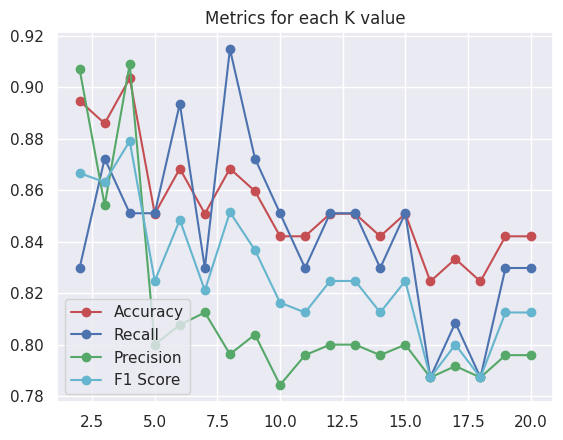

In [9]:
plt.plot(K_vector_1[1:20], accuracy_1_vector[1:20], c='r', marker="o", label='Accuracy')
plt.plot(K_vector_1[1:20], recall_1_vector[1:20], c='b', marker="o", label='Recall')
plt.plot(K_vector_1[1:20], precision_1_vector[1:20], c='g', marker="o", label='Precision')
plt.plot(K_vector_1[1:20], F1_score_1_vector[1:20], c='c', marker="o", label='F1 Score')

plt.legend(loc='lower left')
plt.title('Metrics for each K value')
plt.show()

In [10]:
X_train_1_PCA, X_test_1_PCA = PCA_function(X_train_1, X_test_1, best_K_1)

# "Linear Support vector classifier"
model_lin_1 = SVC(kernel='linear', C=1E7)
model_lin_1.fit(X_train_1_PCA, Y_train_1)
Y_pred_1_linear = model_lin_1.predict(X_test_1_PCA)

recall_1_linear = metrics.recall_score(Y_test_1, Y_pred_1_linear)
precision_1_linear = metrics.precision_score(Y_test_1, Y_pred_1_linear)
accuracy_1_linear = metrics.accuracy_score(Y_test_1, Y_pred_1_linear)
F1_score_1_linear = metrics.f1_score(Y_test_1, Y_pred_1_linear)

print("Accuracy for problem 1 using linear kernel:", accuracy_1_linear)
print("Recall for problem 1 using linear kernel:", recall_1_linear)
print("Precision for problem 1 using linear kernel:", precision_1_linear)
print("F1 Score for problem 1 using linear kernel", precision_1_linear)

Accuracy for problem 1 using linear kernel: 0.9122807017543859
Recall for problem 1 using linear kernel: 0.8723404255319149
Precision for problem 1 using linear kernel: 0.9111111111111111
F1 Score for problem 1 using linear kernel 0.9111111111111111


In [11]:
# "Polynomial Support vector classifier"
model_poly_1 = SVC(kernel='poly', C=1E7)
model_poly_1.fit(X_train_1_PCA, Y_train_1)
Y_pred_1_poly = model_poly_1.predict(X_test_1_PCA)

recall_1_poly = metrics.recall_score(Y_test_1, Y_pred_1_poly)
precision_1_poly = metrics.precision_score(Y_test_1, Y_pred_1_poly)
accuracy_1_poly = metrics.accuracy_score(Y_test_1, Y_pred_1_poly)
F1_score_1_poly = metrics.f1_score(Y_test_1, Y_pred_1_poly)

print("Accuracy for problem 1 using polynomial kernel:", accuracy_1_poly)
print("Recall for problem 1 using polynomial kernel:", recall_1_poly)
print("Precision for problem 1 using polynomial kernel:", precision_1_poly)
print("F1 Score for problem 1 using polynomial kernel", precision_1_poly)

Accuracy for problem 1 using polynomial kernel: 0.9298245614035088
Recall for problem 1 using polynomial kernel: 0.9148936170212766
Precision for problem 1 using polynomial kernel: 0.9148936170212766
F1 Score for problem 1 using polynomial kernel 0.9148936170212766


In [12]:
# "Radial Basis Function Support vector classifier"
model_rbf_1 = SVC(kernel='rbf', C=1E7)
model_rbf_1.fit(X_train_1_PCA, Y_train_1)
Y_pred_1_rbf = model_rbf_1.predict(X_test_1_PCA)

recall_1_rbf = metrics.recall_score(Y_test_1, Y_pred_1_rbf)
precision_1_rbf = metrics.precision_score(Y_test_1, Y_pred_1_rbf)
accuracy_1_rbf = metrics.accuracy_score(Y_test_1, Y_pred_1_rbf)
F1_score_1_rbf = metrics.f1_score(Y_test_1, Y_pred_1_rbf)

print("Accuracy for problem 1 using rbf kernel:", accuracy_1_rbf)
print("Recall for problem 1 using rbf kernel:", recall_1_rbf)
print("Precision for problem 1 using rbf kernel:", precision_1_rbf)
print("F1 Score for problem 1 using rbf kernel", precision_1_rbf)

Accuracy for problem 1 using rbf kernel: 0.8508771929824561
Recall for problem 1 using rbf kernel: 0.8085106382978723
Precision for problem 1 using rbf kernel: 0.8260869565217391
F1 Score for problem 1 using rbf kernel 0.8260869565217391


In [13]:
# "Sigmoid Support vector classifier"
model_sig_1 = SVC(kernel='sigmoid', C=1E7)
model_sig_1.fit(X_train_1_PCA, Y_train_1)
Y_pred_1_sig = model_sig_1.predict(X_test_1_PCA)

recall_1_sig = metrics.recall_score(Y_test_1, Y_pred_1_sig)
precision_1_sig = metrics.precision_score(Y_test_1, Y_pred_1_sig)
accuracy_1_sig = metrics.accuracy_score(Y_test_1, Y_pred_1_sig)
F1_score_1_sig = metrics.f1_score(Y_test_1, Y_pred_1_sig)

print("Accuracy for problem 1 using sigmoid kernel:", accuracy_1_sig)
print("Recall for problem 1 using sigmoid kernel:", recall_1_sig)
print("Precision for problem 1 using sigmoid kernel:", precision_1_sig)
print("F1 Score for problem 1 using sigmoid kernel", precision_1_sig)

Accuracy for problem 1 using sigmoid kernel: 0.9035087719298246
Recall for problem 1 using sigmoid kernel: 0.851063829787234
Precision for problem 1 using sigmoid kernel: 0.9090909090909091
F1 Score for problem 1 using sigmoid kernel 0.9090909090909091


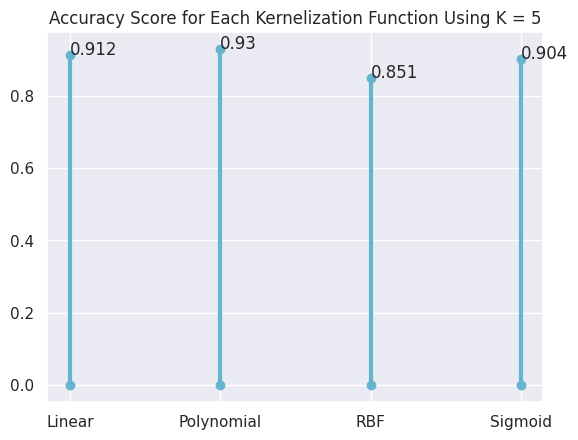

In [14]:
# Comparing accuracy scores for each kernelaztion function using the same K value of 5

kernel_accuracies_1 = [accuracy_1_linear, accuracy_1_poly, accuracy_1_rbf, accuracy_1_sig]
x_axis = [1,2,3,4]

for x, y in zip(x_axis, kernel_accuracies_1):
    plt.plot([x, x], [0, y], color='c', linewidth=3, marker="o")

plt.title('Accuracy Score for Each Kernelization Function Using K = 5')
x_ticks = [1, 2, 3, 4]
x_tick_labels = ['Linear', 'Polynomial', 'RBF', 'Sigmoid']
plt.xticks(x_ticks, x_tick_labels)
plt.annotate(round(accuracy_1_linear,3), (1,accuracy_1_linear))
plt.annotate(round(accuracy_1_poly,3), (2,accuracy_1_poly))
plt.annotate(round(accuracy_1_rbf,3), (3,accuracy_1_rbf))
plt.annotate(round(accuracy_1_sig,3), (4,accuracy_1_sig))
plt.show()

In [15]:
# Problem 2
file_path = '/content/drive/MyDrive/Colab_Notebooks/Data/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [16]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Defining the map function
def data_map(x):
    return x.map({'yes': 1, 'no': 0, 'unfurnished': 0, 'semi-furnished': 0.5, 'furnished': 1})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(data_map)
print('All housing data with binary inputs replaced with ones and zeros: \n')
housing.head()

All housing data with binary inputs replaced with ones and zeros: 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,1.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,1.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,0.5
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,1.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,1.0


In [17]:
np.random.seed(0)
train, test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

price_train = train.values[:, 0]
price_test = test.values[:, 0]
train_len = len(price_train)  # Number of training examples for training set
test_len = len(price_test)  # Number of training examples for test set

vars_2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

train_stand = train
train_stand[vars_2] = scale.fit_transform(train_stand[vars_2])

test_stand = test
test_stand[vars_2] = scale.fit_transform(test_stand[vars_2])

vars_2_train_stand = np.c_[np.ones((train_len, 1)), train_stand[vars_2]]
vars_2_test_stand = np.c_[np.ones((test_len, 1)), test_stand[vars_2]]

from sklearn.svm import SVR

# "Linear Support vector regression"
model_lin_2 = SVR(kernel='linear', C=1e3)
model_lin_2.fit(vars_2_train_stand, price_train)
Y_pred_2_linear = model_lin_2.predict(vars_2_test_stand)

loss_linear = metrics.mean_squared_error(price_test, Y_pred_2_linear)
print('Loss for linear kernel = ', loss_linear)


Loss for linear kernel =  2136878967266.999


In [18]:
loss_at_K_2_lin = 0

K_vector_2_lin = []

loss_vector_lin = []

best_K_2_lin = 1

for K_2_lin in range(1, 11):
  X_train_2_PCA, X_test_2_PCA = PCA_function(vars_2_train_stand, vars_2_test_stand, K_2_lin)

  model_lin_2.fit(X_train_2_PCA, price_train)
  pred_linear = model_lin_2.predict(X_test_2_PCA)

  loss_vector_lin.append(metrics.mean_squared_error(price_test, pred_linear))

  K_vector_2_lin.append(K_2_lin)

  if (metrics.mean_squared_error(price_test, pred_linear) < loss_at_K_2_lin):
    loss_at_K_2_lin = metrics.mean_squared_error(price_test, pred_linear)
    best_K_2_lin = K_2_lin

table_2 = {'K': K_vector_2_lin, 'Mean-Squared-Error' : loss_vector_lin}
final_table_2 = pd.DataFrame(table_2)
print('\n', final_table_2[: ])
print('\nBest K value for for linear kernel for problem 2: ', best_K_2_lin)


     K  Mean-Squared-Error
0   1        2.099301e+12
1   2        2.123979e+12
2   3        2.122285e+12
3   4        2.122991e+12
4   5        2.122170e+12
5   6        2.116160e+12
6   7        2.125507e+12
7   8        2.116232e+12
8   9        2.117517e+12
9  10        2.118305e+12

Best K value for for linear kernel for problem 2:  1


In [20]:
X_train_2_PCA, X_test_2_PCA = PCA_function(vars_2_train_stand, vars_2_test_stand, best_K_2_lin)

model_lin_2.fit(X_train_2_PCA, price_train)
pred_2_linear = model_lin_2.predict(X_test_2_PCA)

loss_2_lin = metrics.mean_squared_error(price_test, pred_linear)

print('Loss for linear kernel usin best K value = ', loss_2_lin)

Loss for linear kernel usin best K value =  2118304991472.518


In [21]:
# "Polynomial Support vector regression"
model = SVR(kernel='poly', C=1e3, degree=2)
model.fit(X_train_2_PCA, price_train)
pred_2_poly = model.predict(X_test_2_PCA)

loss_2_poly = metrics.mean_squared_error(price_test, pred_2_poly)

print('Loss for polynomial kernel = ', loss_2_poly)

Loss for polynomial kernel =  3481529091125.8345


In [22]:
# "RBF Support vector regression"
model = SVR(kernel='rbf', C=1e3, gamma=0.1)
model.fit(X_train_2_PCA, price_train)
pred_2_rbf = model.predict(X_test_2_PCA)

loss_2_rbf = metrics.mean_squared_error(price_test, pred_2_rbf)
print('Loss for RBF kernel = ', loss_2_rbf)

Loss for RBF kernel =  3444956490376.746


In [23]:
# "Sigmoid Support vector regression"
model = SVR(kernel='sigmoid', C=1e3, gamma=0.1)
model.fit(X_train_2_PCA, price_train)
pred_2_rbf = model.predict(X_test_2_PCA)

loss_2_sig = metrics.mean_squared_error(price_test, pred_2_rbf)
print('Loss for RBF kernel = ', loss_2_sig)

Loss for RBF kernel =  3428284428908.1855


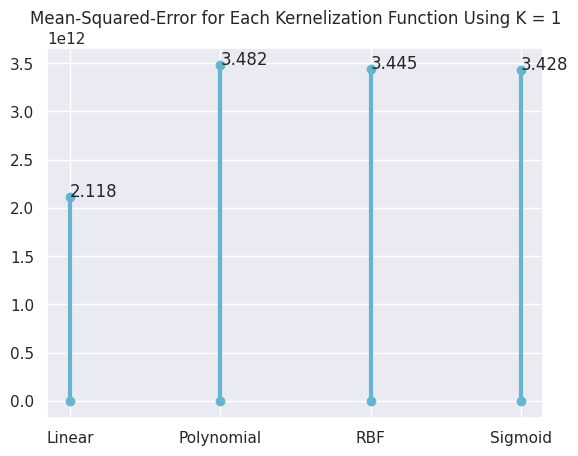

In [25]:
# Comparing accuracy scores for each kernelaztion function using the same K value

kernel_losses = [loss_2_lin, loss_2_poly, loss_2_rbf, loss_2_sig]

for x, y in zip(x_axis, kernel_losses):
    plt.plot([x, x], [0, y], color='c', linewidth=3, marker="o")

plt.title('Mean-Squared-Error for Each Kernelization Function Using K = 1')
x_ticks = [1, 2, 3, 4]
x_tick_labels = ['Linear', 'Polynomial', 'RBF', 'Sigmoid']
plt.xticks(x_ticks, x_tick_labels)
plt.annotate(round((loss_2_lin/1E12),3), (1,loss_2_lin))
plt.annotate(round((loss_2_poly/1E12),3), (2,loss_2_poly))
plt.annotate(round((loss_2_rbf/1E12),3), (3,loss_2_rbf))
plt.annotate(round((loss_2_sig/1E12),3), (4,loss_2_sig))
plt.show()